In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import copy
name[0]

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
list_of_stocks=[]
stocknames = pd.read_csv(r"C:\Users\Abhishek A\Desktop\AI&ML\AI Projects\Advanced Stock price predictor\Data Collection\Stock Names\Nifty50.csv")
name=np.array(stocknames)
for i in range(len(name)):
    for j in range(len(name[i])):
        list_of_stocks.append(name[i][j]+".NS")
for i in list_of_stocks:
    data=yf.download(i)
    data.to_csv(f'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\{i}.csv')

In [4]:
import os
folder_path = r"C:\Users\Abhishek A\Desktop\AI&ML\AI Projects\Advanced Stock price predictor\Data Collection\Stock Data"
name=[]
files = os.listdir(folder_path)
file_paths = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        file_paths.append(file_path)
    name.append(file)
print(file_paths)
print(name)

['C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\ASIANPAINT.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\AXISBANK.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\BAJAJ-AUTO.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\BAJAJFINSV.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\BAJFINANCE.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\BHARTIARTL.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock price predictor\\Data Collection\\Stock Data\\BPCL.NS.csv', 'C:\\Users\\Abhishek A\\Desktop\\AI&ML\\AI Projects\\Advanced Stock p

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [5]:
bullish_stock = None
M=[]
yesterday=[]
for file_path in file_paths:
    data = pd.read_csv(file_path)
    relevant_features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
    X = data[relevant_features]
    y = data['Close']
    tomorrow_data = X.tail(1)
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    tomorrow_pred = model.predict(tomorrow_data)
    yesterday.append(float(tomorrow_pred))
    last_close = y.tail(1).values[0]
    profit = tomorrow_pred - last_close
    M.append(float(profit+float(tomorrow_pred)))
    print(f"Tomorrow's predicted value for {file_path}: {tomorrow_pred}")
    print(f"Last close value for {file_path}: {last_close}")
    print(f"Profit: {profit}")

NameError: name 'pd' is not defined

In [153]:
print(yesterday)
print(M)

[3009.4001973543777, 1062.8968945811407, 8564.067037219093, 1630.8338821165157, 6770.748162741894, 1139.6079040108925, 658.2562670210714, 4924.526197942544, 1467.519035059392, 468.43053400709454, 3753.209786709755, 6426.9859547900915, 3932.378550320392, 2170.252580243753, 1674.240016922792, 3758.9455275174014, 1419.8122056016932, 588.3442512713476, 4878.393015090289, 513.5907268786212, 2385.47310687392, 1041.588954381476, 1493.2890916529673, 1698.292693786638, 410.8219177498055, 817.1532536457992, 1733.8447875497036, 3357.0124163662113, 1842.783795068052, 528.5477590736355, 11547.065760186726, 2509.3135430982084, 339.24915446780574, 276.47468572889045, 276.19702456775235, 2940.3501235085064, 1489.5968902758086, 757.6303369183512, 26874.13840719106, 1526.389761410412, 1157.5483941798507, 932.0194579743709, 142.02889588768664, 4080.1664195278754, 1304.7669827874001, 3696.628527032788, 9927.18124483078, 498.7429078155974, 535.6529218607777]
[3020.7002970525054, 1062.8438379904064, 8618.43

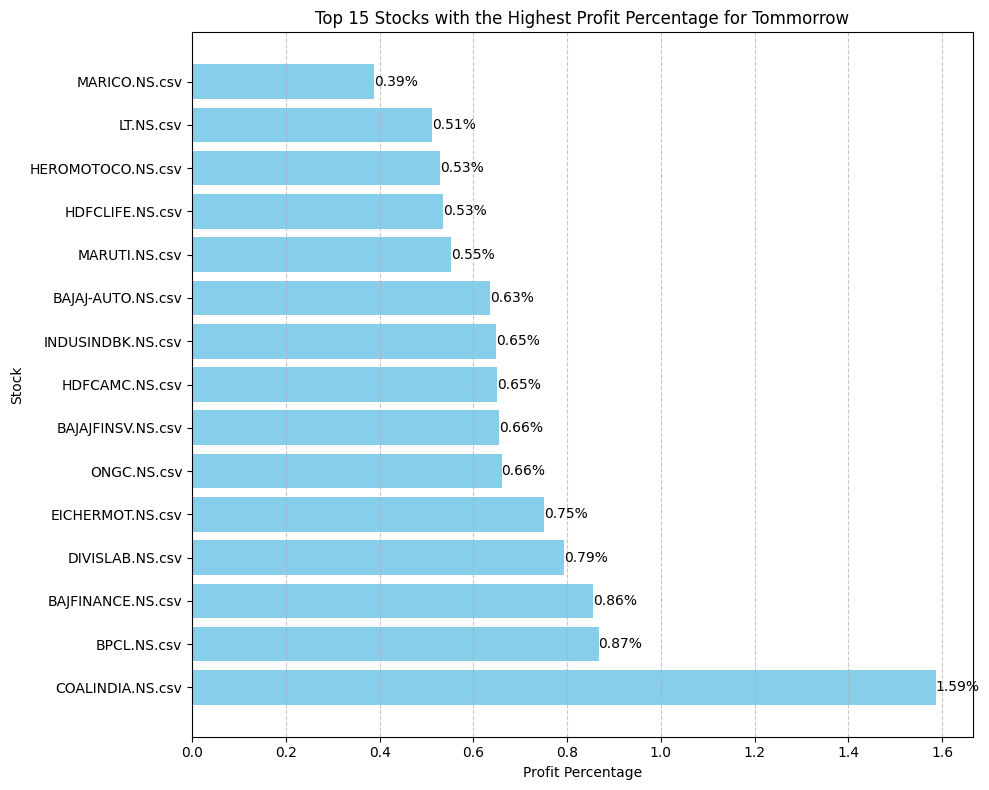

In [152]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
stocks = name # Example stock names
prices_today = M  # Example prices for each stock today
prices_yesterday = yesterday  # Example prices for each stock yesterday

# Calculate profit percentage for each stock
profit_percentages = [(today - yesterday) / yesterday * 100 for today, yesterday in zip(prices_today, prices_yesterday)]

# Sort stocks based on profit percentages and select top 15
sorted_stocks = [stock for _, stock in sorted(zip(profit_percentages, stocks), reverse=True)[:15]]
sorted_profit_percentages = sorted(profit_percentages, reverse=True)[:15]

# Create horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
bars = plt.barh(sorted_stocks, sorted_profit_percentages, color='skyblue')

# Add labels to the bars
for bar, percentage in zip(bars, sorted_profit_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')

# Add labels and title
plt.xlabel('Profit Percentage')
plt.ylabel('Stock')
plt.title('Top 15 Stocks with the Highest Profit Percentage for Tommorrow')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
pip install fastapi


  Using cached fastapi-0.109.2-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic-2.6.1-py3-none-any.whl.metadata (83 kB)
  Using cached starlette-0.36.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
Using cached fastapi-0.109.2-py3-none-any.whl (92 kB)
Using cached pydantic-2.6.1-py3-none-any.whl (394 kB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.9 MB 3.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/1.9 MB 4.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.1/1.9 MB 7.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/1.9 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 9.3 MB/s eta 0:00:00
Using cached starlette-0.36.3-py3-none-any.whl 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.


In [9]:
pip install uvicorn


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 60.8/60.8 kB 640.1 kB/s eta 0:00:00


In [12]:
pip install --upgrade fastapi

Note: you may need to restart the kernel to use updated packages.
